In [1]:

from sklearn.datasets import make_regression
import numpy as np

In [2]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

In [3]:
x

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

### let's cal slope by OLS 

In [4]:
import matplotlib.pyplot as plt

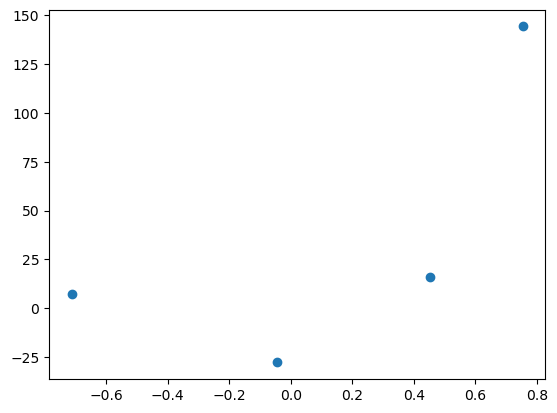

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

In [9]:
m = reg.coef_

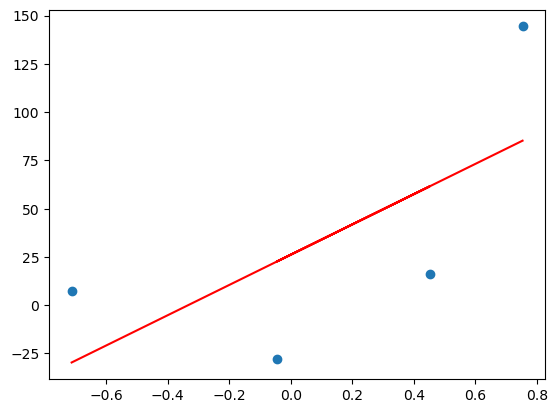

In [10]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

### lets apply gradient descent assuming slope is 78.35 

In [11]:
# lets assume starting value of b = 0
b = 0
y_pred = m*x+b

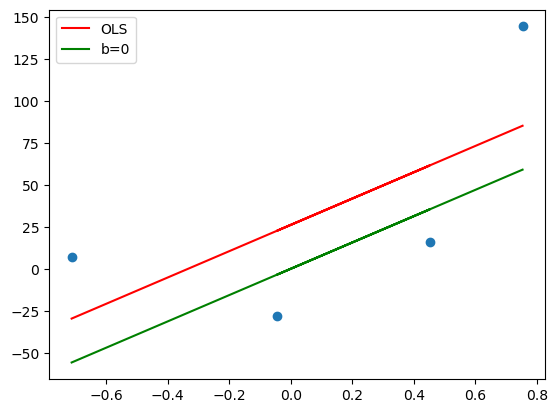

In [12]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')
# green is intial line we apply gradiend descent on green
# red is best fit
plt.legend()

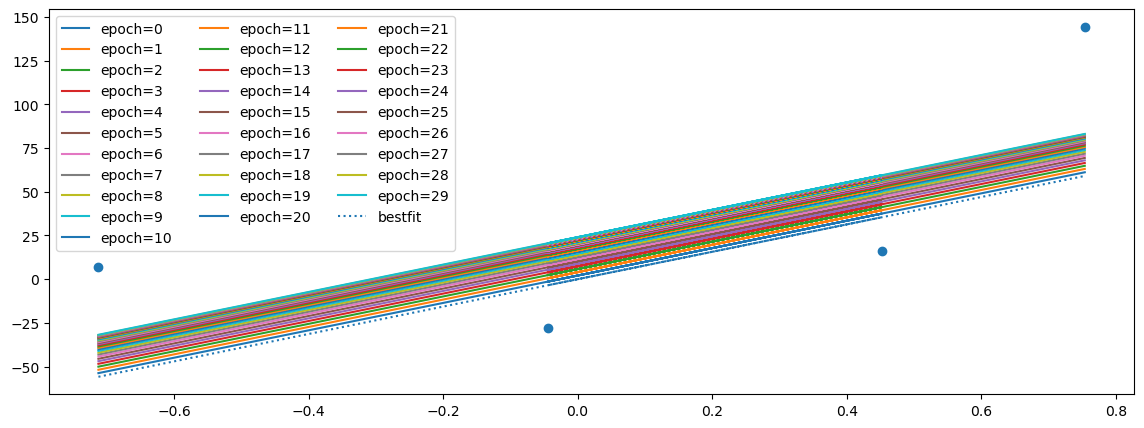

In [13]:

plt.figure(figsize=(14,5))
epocs = 30
learning_rate = 0.01
b_old = 0
for i in range(epocs):
    slope = -2*np.sum(y-m*x.ravel()-b_old)
    step_size = learning_rate*slope
    b_new = b_old - step_size
    y_pred_temp = m*x+b_new
    plt.plot(x,y_pred_temp,label='epoch={}'.format(i))
    b_old = b_new

plt.plot(x,y_pred,label='bestfit',ls='dotted')
plt.scatter(x,y)
plt.legend(loc='best',ncols=3)

### lets create a class of gradient descent

In [27]:
class GDRegressor:
    def __init__(self,learning_rate,epochs,slope,initial_b):
        self.b = initial_b
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = slope

    def fit(self,x,y):
        b_old = self.b
        for i in range(self.epochs):
            loss_slope = -2*np.sum(y-m*x.ravel()-b_old)
            step_size = self.learning_rate*loss_slope
            b_new = b_old-step_size
            b_old = b_new
        self.b = b_old
        print("The intercept : ",b_old)

In [28]:
gdr = GDRegressor(learning_rate=0.1,epochs=10,slope=m,initial_b=100)
gdr.fit(x,y)

The intercept :  26.159640404386217
